In [1]:
!nvidia-smi

Sat Nov 21 20:42:58 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.38       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
import matplotlib.pyplot as plt 
from keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D

In [3]:
test_data_path="/content/drive/MyDrive/Various Plant Disesse Detection Prediction Limited Data/test"
train_data_path="/content/drive/MyDrive/Various Plant Disesse Detection Prediction Limited Data/train"
val_data_path="/content/drive/MyDrive/Various Plant Disesse Detection Prediction Limited Data/val"

In [4]:
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest',
                                      )

In [5]:
train_data=training_datagen.flow_from_directory(train_data_path,target_size=(150,150),class_mode='binary',batch_size=32)

Found 5537 images belonging to 19 classes.


In [6]:
train_data.class_indices

{'Pepper__bell___Bacterial_spot': 0,
 'Pepper__bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato_Bacterial_spot': 5,
 'Tomato_Early_blight': 6,
 'Tomato_Late_blight': 7,
 'Tomato_Leaf_Mold': 8,
 'Tomato_Septoria_leaf_spot': 9,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 10,
 'Tomato__Target_Spot': 11,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 12,
 'Tomato__Tomato_mosaic_virus': 13,
 'Tomato_healthy': 14,
 'diseased cotton leaf': 15,
 'diseased cotton plant': 16,
 'fresh cotton leaf': 17,
 'fresh cotton plant': 18}

In [7]:
val_datagen=ImageDataGenerator(rescale=1/255)

In [8]:
val_data=val_datagen.flow_from_directory(val_data_path,target_size=(150,150),class_mode='binary',batch_size=32)

Found 1446 images belonging to 19 classes.


In [9]:
def plot_images(images):
  fig,axes=plt.subplots(1,5,figsize=(20,20))
  axes=axes.flatten()
  for ax,img in zip(axes,images):
    ax.imshow(img)

In [10]:
images=[train_data[0][0][0] for i in range(5)]

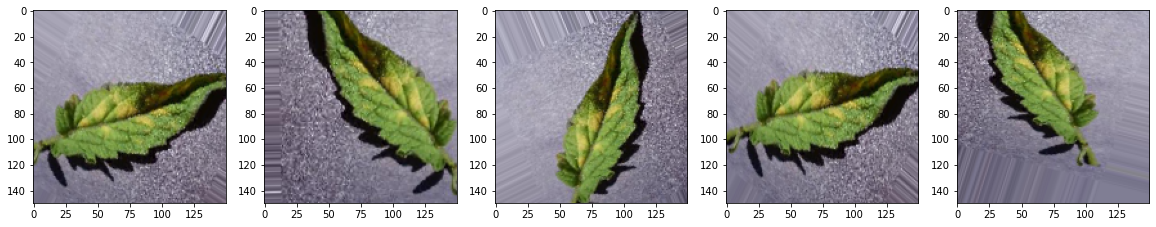

In [11]:
plot_images(images)

In [12]:
model_path="/content/drive/MyDrive/PLANT DISEASE DETECTION H5 MODEL/Various Plant Disease Detection Model1.h5"
checkpoint=ModelCheckpoint(model_path,monitor='val_accuracy',save_best_only=True)

In [13]:
callbacks_list=[checkpoint]

In [14]:
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
 
                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=19, activation='softmax') # output layer
])

In [15]:
# compile cnn model
cnn_model.compile(optimizer = Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
 
# train cnn model
history = cnn_model.fit(train_data, 
                          epochs=500,
                          verbose=1, 
                          validation_data= val_data,
                          callbacks=callbacks_list,
                        )

Epoch 1/500
174/174 [==============================] - 3269s 19s/step - loss: 2.6612 - accuracy: 0.1391 - val_loss: 2.2448 - val_accuracy: 0.2752
Epoch 2/500
174/174 [==============================] - 50s 285ms/step - loss: 2.2456 - accuracy: 0.2646 - val_loss: 2.0659 - val_accuracy: 0.3119
Epoch 3/500
174/174 [==============================] - 49s 284ms/step - loss: 2.0184 - accuracy: 0.3431 - val_loss: 2.0139 - val_accuracy: 0.3631
Epoch 4/500
174/174 [==============================] - 49s 284ms/step - loss: 1.8409 - accuracy: 0.4089 - val_loss: 1.8077 - val_accuracy: 0.4329
Epoch 5/500
174/174 [==============================] - 49s 283ms/step - loss: 1.6858 - accuracy: 0.4499 - val_loss: 1.8542 - val_accuracy: 0.4336
Epoch 6/500
174/174 [==============================] - 49s 283ms/step - loss: 1.5473 - accuracy: 0.4965 - val_loss: 1.6759 - val_accuracy: 0.4613
Epoch 7/500
174/174 [==============================] - 50s 287ms/step - loss: 1.4641 - accuracy: 0.5218 - val_loss: 1.6559 -

# New Section

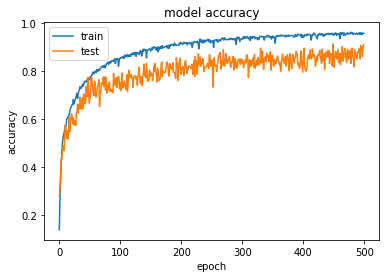

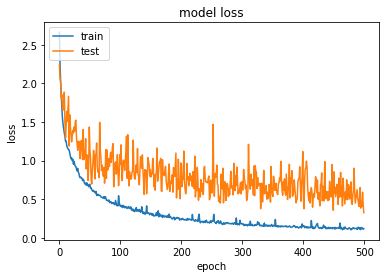

{'accuracy': [0.1390644758939743,
  0.2645837068557739,
  0.34314611554145813,
  0.4088856875896454,
  0.4498825967311859,
  0.49647822976112366,
  0.5217626690864563,
  0.5349467396736145,
  0.545241117477417,
  0.5586057305335999,
  0.5750406384468079,
  0.5714285969734192,
  0.599963903427124,
  0.6042983531951904,
  0.6109806895256042,
  0.6124255061149597,
  0.615856945514679,
  0.629402220249176,
  0.6442116498947144,
  0.6494491696357727,
  0.654144823551178,
  0.6608271598815918,
  0.6620913743972778,
  0.6824995279312134,
  0.6637167930603027,
  0.6714827418327332,
  0.6797904968261719,
  0.6893624663352966,
  0.7003792524337769,
  0.7094094157218933,
  0.6877370476722717,
  0.7070615887641907,
  0.7162723541259766,
  0.7258443236351013,
  0.7364999055862427,
  0.7283727526664734,
  0.7314430475234985,
  0.7355968952178955,
  0.7466136813163757,
  0.7379447221755981,
  0.7440852522850037,
  0.7572692632675171,
  0.7565468549728394,
  0.7601589560508728,
  0.758894681930542,
  

In [16]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
 
history.history

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section

# New Section